# Accessible Algorithms

### @maxhumber

##### PyCon 🇨🇦
2018-11-10

## > save the environment
## > defeat your enemies

![](images/kramer.gif)

![](images/network.png)

![](images/googlebois.jpg)

![](images/pagerank_paper.png)

![](images/pagerank.jpg)

The PageRank algorithm outputs a probability distribution used to represent the likelihood that a person randomly clicking on links will arrive at any particular page. 

![](images/sa.png)

> ...a species is important if important species rely on it for their survival...

![](images/foodweb.png)

Source: [mmnp201166p22.pdf](https://www.mmnp-journal.org/articles/mmnp/pdf/2011/06/mmnp201166p22.pdf)

![](images/camelot.png)

In [1]:
# !pip install camelot-py[cv]

import pandas as pd
import camelot

tables = camelot.read_pdf('data/mmnp201166p22.pdf', pages='5')
tables[0].parsing_report

{'accuracy': 100.0, 'whitespace': 0.0, 'order': 1, 'page': 5}

In [2]:
print('>', len(tables))

df = tables[0].df
df

> 1


,0,1
0,Species,Species they feed on
1,Shark,Sea otter
2,Sea otter,"Sea stars, sea urchins, large crabs, large ﬁsh..."
3,Sea stars,"Abalone, small herbivorous ﬁshes, sea urchins"
4,Sea urchins,"Kelp, sessile invertebrates, drift algae and d..."
5,Abalone,Drift algae and dead animals
6,Large crabs,"Sea stars, smaller predatory ﬁshes and inverte..."
7,Smaller predatory ﬁshes,"Sessile invertebrates, planktonic invertebrates"
8,Small herbivorous ﬁshes andinvertebrates,Kelp
9,Kelp,--


In [3]:
df.columns = ['pred', 'prey']
df = df.reindex(df.index.drop(0))

mapping = {
    'ani-mals': 'animals',
    'and dead animals': '',
    'drift ': '',
    'andoctopus': 'and octopus',
    'microscopicplanktonicalgae': 'microscopic planktonic algae',
    'planktonicinverte-brates': 'planktonic invertebrates',
    'andinvertebrates': 'and invertebrates',
    'and invertebrates': '',
    'ﬁshesand': 'fishes and',
    'ﬁ': 'fi',
}

In [4]:
import re

print(mapping['microscopicplanktonicalgae'])

def fix_text(text, mapping):
    for k, v in mapping.items():
        t = re.compile(re.escape(k), re.IGNORECASE)
        text = t.sub(v, text)
    return text

df.pred = df.pred.apply(lambda x: fix_text(x.lower(), mapping))
df.prey = df.prey.apply(lambda x: fix_text(x.lower(), mapping))

microscopic planktonic algae


In [7]:
df.head()

,pred,prey
1,shark,sea otter
2,sea otter,"sea stars, sea urchins, large crabs, large fis..."
3,sea stars,"abalone, small herbivorous fishes, sea urchins"
4,sea urchins,"kelp, sessile invertebrates, algae"
5,abalone,algae


In [8]:
(
    df.prey
    .str
    .split(',', expand=True)
    .stack()
    .reset_index(drop=True, level=1)
    .rename('prey')
).head()

1                  sea otter
2                  sea stars
2                sea urchins
2                large crabs
2     large fish and octopus
Name: prey, dtype: object

In [9]:
df = df.drop('prey', axis=1).join(
    df.prey
    .str
    .split(',', expand=True)
    .stack()
    .reset_index(drop=True, level=1)
    .rename('prey')
).reset_index(drop=True)

df.head()

,pred,prey
0,shark,sea otter
1,sea otter,sea stars
2,sea otter,sea urchins
3,sea otter,large crabs
4,sea otter,large fish and octopus


In [10]:
df = df[df['prey'] != '--']
df.loc[:,'prey'] = df['prey'].str.strip()
df.loc[:,'pred'] = df['pred'].str.strip()

In [12]:
df.to_csv('data/food_web.csv', index=False)

df.head()

,pred,prey
0,shark,sea otter
1,sea otter,sea stars
2,sea otter,sea urchins
3,sea otter,large crabs
4,sea otter,large fish and octopus


In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
G = nx.DiGraph()

G.add_edge('shark', 'sea otter')
G.add_edge('sea otter', 'sea stars')

G.nodes()
G.edges()

OutEdgeView([('shark', 'sea otter'), ('sea otter', 'sea stars')])

In [15]:
df = pd.read_csv('data/food_web.csv')

G = nx.from_pandas_edgelist(
        df, 
        source='pred', 
        target='prey', 
        create_using=nx.DiGraph
)

In [16]:
from pprint import pprint
pprint(list(G.nodes))

['shark',
 'sea otter',
 'sea stars',
 'sea urchins',
 'large crabs',
 'large fish and octopus',
 'abalone',
 'small herbivorous fishes',
 'kelp',
 'sessile invertebrates',
 'algae',
 'smaller predatory fishes',
 'planktonic invertebrates',
 'microscopic planktonic algae']


In [17]:
pprint(list(G.edges))

[('shark', 'sea otter'),
 ('sea otter', 'sea stars'),
 ('sea otter', 'sea urchins'),
 ('sea otter', 'large crabs'),
 ('sea otter', 'large fish and octopus'),
 ('sea otter', 'abalone'),
 ('sea stars', 'abalone'),
 ('sea stars', 'small herbivorous fishes'),
 ('sea stars', 'sea urchins'),
 ('sea urchins', 'kelp'),
 ('sea urchins', 'sessile invertebrates'),
 ('sea urchins', 'algae'),
 ('large crabs', 'sea stars'),
 ('large crabs', 'smaller predatory fishes'),
 ('large crabs', 'algae'),
 ('large crabs', 'small herbivorous fishes'),
 ('large crabs', 'kelp'),
 ('large fish and octopus', 'smaller predatory fishes'),
 ('abalone', 'algae'),
 ('small herbivorous fishes', 'kelp'),
 ('sessile invertebrates', 'microscopic planktonic algae'),
 ('sessile invertebrates', 'planktonic invertebrates'),
 ('algae', 'kelp'),
 ('algae', 'sessile invertebrates'),
 ('smaller predatory fishes', 'sessile invertebrates'),
 ('smaller predatory fishes', 'planktonic invertebrates'),
 ('planktonic invertebrates', 'mic

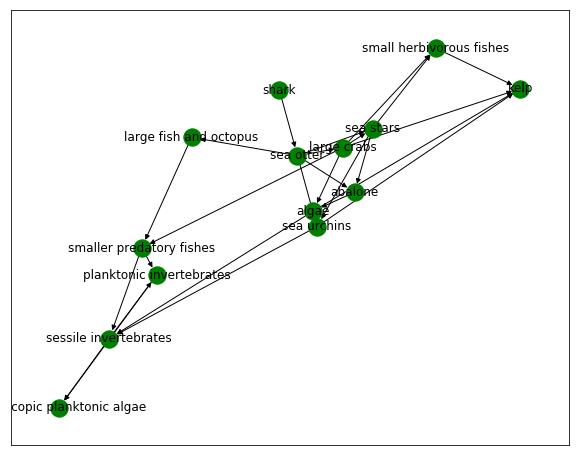

In [18]:
np.random.seed(1)
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, node_color='green')
plt.xticks([])
plt.yticks([]);

$$PR(A) = (1-d) + d (\frac{PR(T_1)}{C(T_1)} + ... + \frac{PR(T_n)}{C(T_n)})$$

where
- PR(A) is the PageRank of page A
- PR(Ti) is the PageRank of pages Ti which link to page A
- C(Ti) is the number of outbound links on page Ti and
- d is a damping factor which can be set between 0 and 1

In [19]:
def pagerank(G, alpha=0.85, max_iter=100, tol=1.0e-6):

    W = nx.stochastic_graph(G)
    N = len(W)
    x = {n: 1/N for n in W.nodes}

    p = x
    dangling_weights = p
    dangling_nodes = [n for n in W if W.out_degree(n) == 0.0]

    for _ in range(max_iter):
        xlast = x
        x = {key: 0 for key in x}
        danglesum = alpha * sum([xlast[n] for n in dangling_nodes])
        for n in x:
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] * W[n][nbr]['weight']
            x[n] += danglesum * dangling_weights.get(n, 0) + (1.0 - alpha) * p.get(n, 0)
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N * tol:
            return x

In [20]:
pprint(pagerank(G, alpha=0.85))

{'abalone': 0.04940106801052845,
 'algae': 0.09052025512398879,
 'kelp': 0.1268076024301348,
 'large crabs': 0.03710188718650615,
 'large fish and octopus': 0.03710188718650615,
 'microscopic planktonic algae': 0.16160847090331737,
 'planktonic invertebrates': 0.10253360633998779,
 'sea otter': 0.052216411290389245,
 'sea stars': 0.0434091571287912,
 'sea urchins': 0.04940106801052845,
 'sessile invertebrates': 0.1087727093009147,
 'shark': 0.028225268889463057,
 'small herbivorous fishes': 0.046831719655770404,
 'smaller predatory fishes': 0.06606888854317333}


In [21]:
pprint(nx.pagerank(G, alpha=0.85))

{'abalone': 0.04940106801052845,
 'algae': 0.09052025512398879,
 'kelp': 0.1268076024301348,
 'large crabs': 0.03710188718650615,
 'large fish and octopus': 0.03710188718650615,
 'microscopic planktonic algae': 0.16160847090331737,
 'planktonic invertebrates': 0.10253360633998779,
 'sea otter': 0.052216411290389245,
 'sea stars': 0.0434091571287912,
 'sea urchins': 0.04940106801052845,
 'sessile invertebrates': 0.1087727093009147,
 'shark': 0.028225268889463057,
 'small herbivorous fishes': 0.046831719655770404,
 'smaller predatory fishes': 0.06606888854317333}


In [22]:
pageranks = pagerank(G, alpha=0.85)
for g in G.nodes():
    G.nodes[g]['name'] = g
    G.nodes[g]['pagerank'] = round(pageranks[g], 4)

In [23]:
G.nodes['shark']

{'name': 'shark', 'pagerank': 0.0282}

In [24]:
import altair as alt
import nx_altair as nxa
alt.renderers.enable('notebook')

pos = nx.kamada_kawai_layout(G)

pr_viz = nxa.draw_networkx(
    G,
    pos=pos,
    node_tooltip=['name', 'pagerank'],
    node_color='pagerank',
    node_size='pagerank',
    cmap='blues'
)

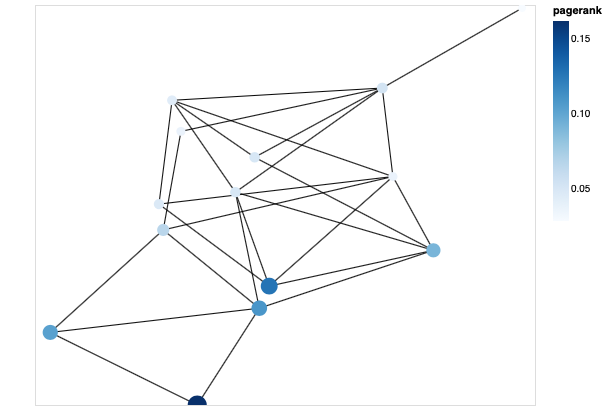

In [25]:
pr_viz.interactive().properties(width=500, height=400)

"This approach contrasts with other ways of looking at ecosystems, which use a 'hub' approach to rank species based on the number of other species that are directly linked to it through the food web ... The 'PageRank' way of looking at ecosystems makes the species that goes extinct first the most important because it would result in further extinctions down the line."

In [26]:
in_degree = dict(G.in_degree)
pprint(in_degree)

{'abalone': 2,
 'algae': 3,
 'kelp': 4,
 'large crabs': 1,
 'large fish and octopus': 1,
 'microscopic planktonic algae': 2,
 'planktonic invertebrates': 2,
 'sea otter': 1,
 'sea stars': 2,
 'sea urchins': 2,
 'sessile invertebrates': 3,
 'shark': 0,
 'small herbivorous fishes': 2,
 'smaller predatory fishes': 2}


In [27]:
for g in G.nodes():
    G.nodes[g]['name'] = g
    G.nodes[g]['in_degree'] = in_degree[g]

hub_viz = nxa.draw_networkx(
    G,
    pos=pos,
    node_tooltip=['name', 'in_degree'],
    node_color='in_degree',
    node_size='in_degree',
    cmap='greens'
)

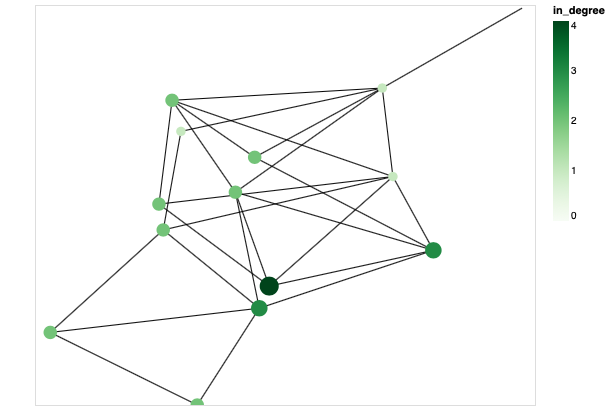

In [28]:
hub_viz.interactive().properties(width=500, height=400)

![](images/whales.png)

![](images/captain.gif)

![](images/fantasy.png)

![](images/blotto.png)

![](images/blotto2.png)

> adding battlefields increases the number of interactions (dimensions) and improves the chances of an upset. 

![](images/fantasy_settings.png)

![](images/nhl_blotto.png)

![](images/adp.png)

![](images/jime.jpg)

In [29]:
import pandas as pd

CATEGORIES = [
    'goals',
    'assists',
    'plus_minus',
    'powerplay_points',
    'shots_on_goal',
    'hits',
    'blocks',
    'wins',
    'goals_against_average',
    'saves',
    'save_percentage',
    'shutouts'
]

raw = pd.read_csv('data/nhl_draft_2018.csv')
df = raw.copy()

In [30]:
import numpy as np 

np.random.seed(1)
df.sample(10)

,name,position,adp,goals,assists,plus_minus,powerplay_points,shots_on_goal,hits,blocks,wins,goals_against_average,saves,save_percentage,shutouts
114,T.J. Oshie,RW,120.0,22.3825,32.615000,15.1700,15.250000,115.75,59.25,27.500000,0.0000,0.0000,0.0000,0.00000,0.0000
85,Tyson Barrie,D,88.0,14.3450,44.637500,-9.8625,23.250000,139.50,18.50,40.000000,0.0000,0.0000,0.0000,0.00000,0.0000
97,Morgan Rielly,D,102.0,7.6025,45.715000,6.8000,20.750000,132.50,24.75,52.000000,0.0000,0.0000,0.0000,0.00000,0.0000
160,Dustin Brown,RW,168.0,23.8975,28.967500,5.8775,8.250000,158.25,103.75,14.500000,0.0000,0.0000,0.0000,0.00000,0.0000
35,Frederik Andersen,G,36.0,0.0000,0.000000,0.0000,0.000000,0.00,0.00,0.000000,37.1575,2.6375,884.5525,0.91725,2.9625
54,Jonathan Marchessault,C,55.0,30.5600,42.833333,19.2800,12.333333,168.00,69.00,14.666667,0.0000,0.0000,0.0000,0.00000,0.0000
124,Sean Couturier,C,131.0,21.1325,30.895000,11.4575,9.750000,157.25,28.75,20.500000,0.0000,0.0000,0.0000,0.00000,0.0000
19,Brent Burns,D,20.0,18.0700,50.690000,0.8725,24.250000,234.75,41.25,70.250000,0.0000,0.0000,0.0000,0.00000,0.0000
108,Reilly Smith,LW,114.0,24.6100,38.962500,22.7675,11.250000,139.50,27.00,14.750000,0.0000,0.0000,0.0000,0.00000,0.0000
125,Antti Raanta,G,132.0,0.0000,0.000000,0.0000,0.000000,0.00,0.00,0.000000,24.8825,2.4450,769.2125,0.91950,3.5450


In [31]:
from sklearn.model_selection import train_test_split 

target = 'adp'

y = df[target].values
X = df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [32]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([
    ('position', LabelBinarizer()),
    (['goals'], StandardScaler()),
    (['assists'], StandardScaler()),
    (['plus_minus'], StandardScaler()),
    (['powerplay_points'], StandardScaler()),
    (['shots_on_goal'], StandardScaler()),
    (['hits'], StandardScaler()),
    (['blocks'], StandardScaler()),
    (['wins'], StandardScaler()),
    (['goals_against_average'], StandardScaler()),
    (['saves'], StandardScaler()),
    (['save_percentage'], StandardScaler()),
    (['shutouts'], StandardScaler())
], df_out=True)

X_train = mapper.fit_transform(X_train)
X_test = mapper.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.predict(X_test)[:10]

array([ 58.98562858, 111.85216118, 137.73149763, 122.46993907,
        50.0146501 ,  95.60675443,  89.65006282,  -0.88417031,
       175.05231979, 109.94944423])

# 🙅🏻‍♀️

In [34]:
#!pip install mord

import mord

model = mord.OrdinalRidge(fit_intercept=False)

model.fit(X_train, y_train)

model.predict(X_test)[:5]

array([ 45., 105., 139., 117.,  64.])

In [35]:
compare = pd.DataFrame({
    'true': y_test,
    'pred': model.predict(X_test)
})

compare.head()

,true,pred
0,50.0,45.0
1,73.0,105.0
2,109.0,139.0
3,107.0,117.0
4,78.0,64.0


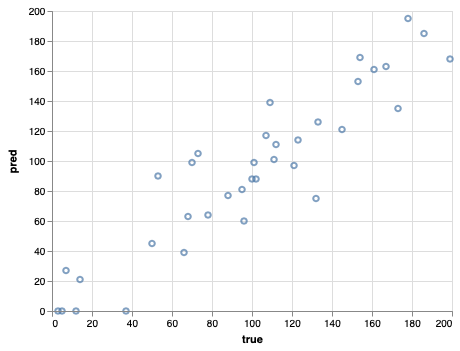

In [36]:
import altair as alt
alt.renderers.enable('notebook')

(
    alt.Chart(compare)
    .mark_point()
    .encode(
        x='true', 
        y='pred'
    )
)

In [37]:
from sklearn.metrics import r2_score

r2_score(compare['true'], compare['pred'])

0.8382371426085107

In [38]:
bias = pd.DataFrame({
    'feature': mapper.transformed_names_,
    'coef': model.coef_
}).sort_values('coef')

bias = bias[~bias.feature.str.contains('position')]

In [39]:
bias

,feature,coef
12,wins,-44.755466
5,goals,-35.614943
6,assists,-33.406105
9,shots_on_goal,-18.803191
16,shutouts,-16.977435
8,powerplay_points,-15.200296
13,goals_against_average,-10.403468
7,plus_minus,-7.260427
14,saves,-5.824131
10,hits,-5.062121


> Underdogs can change the odds of winning simply by changing the basis of competition.

[Source](https://fs.blog/2010/07/colonel-blotto-game/)

![](images/nhl_blotto.png)

In [40]:
df.head()

,name,position,adp,goals,assists,plus_minus,powerplay_points,shots_on_goal,hits,blocks,wins,goals_against_average,saves,save_percentage,shutouts
0,Connor McDavid,C,1.0,40.2750,69.665000,13.217500,19.75,208.250000,15.0,17.750000,0.0,0.0,0.0,0.0,0.0
1,Nikita Kucherov,RW,2.0,41.5150,56.670000,17.495000,28.50,214.750000,20.0,10.500000,0.0,0.0,0.0,0.0,0.0
2,Alex Ovechkin,LW,3.0,50.2300,39.236667,17.126667,21.00,245.666667,65.0,9.333333,0.0,0.0,0.0,0.0,0.0
3,Sidney Crosby,C,4.0,35.7775,62.445000,14.142500,28.75,197.500000,34.0,15.750000,0.0,0.0,0.0,0.0,0.0
4,Brad Marchand,LW,5.0,38.3900,52.975000,19.537500,20.00,174.250000,25.0,15.750000,0.0,0.0,0.0,0.0,0.0


In [41]:
# GAA is a bad thing, need to reverse
df['goals_against_average'] = -df['goals_against_average']

df[CATEGORIES] = (
    df
    [CATEGORIES]
    .apply(lambda x: (x - x.min()) / (x.max() - x.min()))
)

In [42]:
df.head()

,name,position,adp,goals,assists,plus_minus,powerplay_points,shots_on_goal,hits,blocks,wins,goals_against_average,saves,save_percentage,shutouts
0,Connor McDavid,C,1.0,0.801812,1.000000,0.760291,0.470238,0.836345,0.144578,0.200000,0.0,1.0,0.0,0.0,0.0
1,Nikita Kucherov,RW,2.0,0.826498,0.813464,0.838983,0.678571,0.862450,0.192771,0.118310,0.0,1.0,0.0,0.0,0.0
2,Alex Ovechkin,LW,3.0,1.000000,0.563219,0.832207,0.500000,0.986613,0.626506,0.105164,0.0,1.0,0.0,0.0,0.0
3,Sidney Crosby,C,4.0,0.712274,0.896361,0.777308,0.684524,0.793173,0.327711,0.177465,0.0,1.0,0.0,0.0,0.0
4,Brad Marchand,LW,5.0,0.764284,0.760425,0.876558,0.476190,0.699799,0.240964,0.177465,0.0,1.0,0.0,0.0,0.0


In [43]:
def blotto(x, out_range=[0.80, 1]):
    domain = np.min(x), np.max(x)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

bias['mod'] = bias[['coef']].apply(lambda x: blotto(x, (0.8, 1)))
bias = bias[['feature', 'mod']].set_index('feature').iloc[:,0]

bias

feature
wins                     0.800000
goals                    0.843995
assists                  0.854627
shots_on_goal            0.924914
shutouts                 0.933702
powerplay_points         0.942256
goals_against_average    0.965344
plus_minus               0.980472
saves                    0.987386
hits                     0.991053
save_percentage          0.997072
blocks                   1.000000
Name: mod, dtype: float64

In [45]:
df[list(bias.keys())] *= bias

df.head()

,name,position,adp,goals,assists,plus_minus,powerplay_points,shots_on_goal,hits,blocks,wins,goals_against_average,saves,save_percentage,shutouts
0,Connor McDavid,C,1.0,0.676725,0.854627,0.745444,0.443085,0.773548,0.143285,0.200000,0.0,0.965344,0.0,0.0,0.0
1,Nikita Kucherov,RW,2.0,0.697561,0.695209,0.822599,0.639388,0.797692,0.191046,0.118310,0.0,0.965344,0.0,0.0,0.0
2,Alex Ovechkin,LW,3.0,0.843995,0.481342,0.815956,0.471128,0.912533,0.620901,0.105164,0.0,0.965344,0.0,0.0,0.0
3,Sidney Crosby,C,4.0,0.601156,0.766055,0.762129,0.644997,0.733617,0.324779,0.177465,0.0,0.965344,0.0,0.0,0.0
4,Brad Marchand,LW,5.0,0.645052,0.649880,0.859441,0.448693,0.647254,0.238808,0.177465,0.0,0.965344,0.0,0.0,0.0


In [46]:
from copy import deepcopy

cats = deepcopy(CATEGORIES)

cats.remove('goals')
cats.remove('shutouts')

df['score'] = df[cats].sum(axis=1)

df[['name', 'position', 'score']].head(10)

,name,position,score
0,Connor McDavid,C,4.125333
1,Nikita Kucherov,RW,4.229589
2,Alex Ovechkin,LW,4.372368
3,Sidney Crosby,C,4.374385
4,Brad Marchand,LW,3.986886
5,Patrik Laine,RW,3.860518
6,Patrick Kane,RW,3.650039
7,Nathan MacKinnon,C,3.878440
8,John Tavares,C,4.006343
9,Auston Matthews,C,4.005856


![](images/fantasy_settings.png)

In [47]:
starters = {'C': 2, 'LW': 2, 'RW': 2, 'D': 4, 'G': 2}

players = sum(starters.values())
skaters = sum([value for key, value in starters.items() if key != 'G'])
goalies = players - skaters

print(skaters)
print(goalies)

10
2


In [48]:
# df['score'] = df['score'] / players
df['score'] = np.where(df['position'] == 'G', df['score'] / goalies, df['score'] / skaters)

df[['name', 'position', 'score']].head()

,name,position,score
0,Connor McDavid,C,0.412533
1,Nikita Kucherov,RW,0.422959
2,Alex Ovechkin,LW,0.437237
3,Sidney Crosby,C,0.437438
4,Brad Marchand,LW,0.398689


In [49]:
raw.groupby('position').mean()

,adp,goals,assists,plus_minus,powerplay_points,shots_on_goal,hits,blocks,wins,goals_against_average,saves,save_percentage,shutouts
position,,,,,,,,,,,,,
C,90.814815,27.847870,41.831867,6.499907,16.208333,160.316358,32.353395,19.879630,0.000000,0.000000,0.000000,0.000000,0.000000
D,106.727273,11.287386,35.609716,3.702670,14.823864,136.880682,43.346591,56.119318,0.000000,0.000000,0.000000,0.000000,0.000000
G,71.807692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.980192,2.548462,773.886346,0.916865,2.829712
LW,81.846154,28.906122,36.666987,5.528686,13.282051,170.467949,33.320513,15.461538,0.000000,0.000000,0.000000,0.000000,0.000000
RW,107.931034,27.010718,35.137500,2.843103,15.698276,163.390805,37.879310,18.919540,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
pool_size = 10

for position, slots in starters.items():
    replacement = (
        df[df['position'] == position]
        .sort_values('score', ascending=False)
        .head(slots * pool_size)
        ['score']
        .mean()
    )
    df.loc[df['position'] == position, 'score'] = df['score'] - replacement

In [52]:
df[['name', 'position', 'score']].sort_values('score', ascending=False).head()

,name,position,score
11,Andrei Vasilevskiy,G,0.120399
2,Alex Ovechkin,LW,0.079319
29,Erik Karlsson,D,0.077475
19,Brent Burns,D,0.077302
17,Pekka Rinne,G,0.075867


In [53]:
scale = blotto

df['score'] = df[['score']].apply(lambda x: scale(x, (0, 1)))
df['my_rank'] = df['score'].rank(method='average', ascending=False)
df = df.sort_values('my_rank')

In [54]:
df['position_rank'] = df.groupby(['position'])['score'].rank(ascending=False)
df['arbitrage'] = df['adp'] - df['my_rank']

In [55]:
df[['name', 'position', 'score', 'adp', 'my_rank', 'position_rank', 'arbitrage']].head()

,name,position,score,adp,my_rank,position_rank,arbitrage
11,Andrei Vasilevskiy,G,1.000000,12.0,1.0,1.0,11.0
2,Alex Ovechkin,LW,0.929064,3.0,2.0,1.0,1.0
29,Erik Karlsson,D,0.925880,30.0,3.0,1.0,27.0
19,Brent Burns,D,0.925582,20.0,4.0,2.0,16.0
17,Pekka Rinne,G,0.923104,18.0,5.0,2.0,13.0


![](images/draft.png)

![](images/my_draft.png)

![](images/afterdraft.png)

![](images/lastweek.png)

![](https://media.giphy.com/media/lD76yTC5zxZPG/giphy.gif)

<div align="center">

    twitter: @maxhumber
    linkedin: /in/maxhumber
    email: maxhumber@gmail.com

</div>